In [49]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans,AgglomerativeClustering, DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.decomposition import PCA
from scipy.spatial.distance import dice

In [3]:
# Load the wine dataset
df = pd.read_csv(r"C:\Users\ajmal\Downloads\DSA\Wine_clust.csv")

In [69]:
df.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [70]:
df

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


<AxesSubplot:>

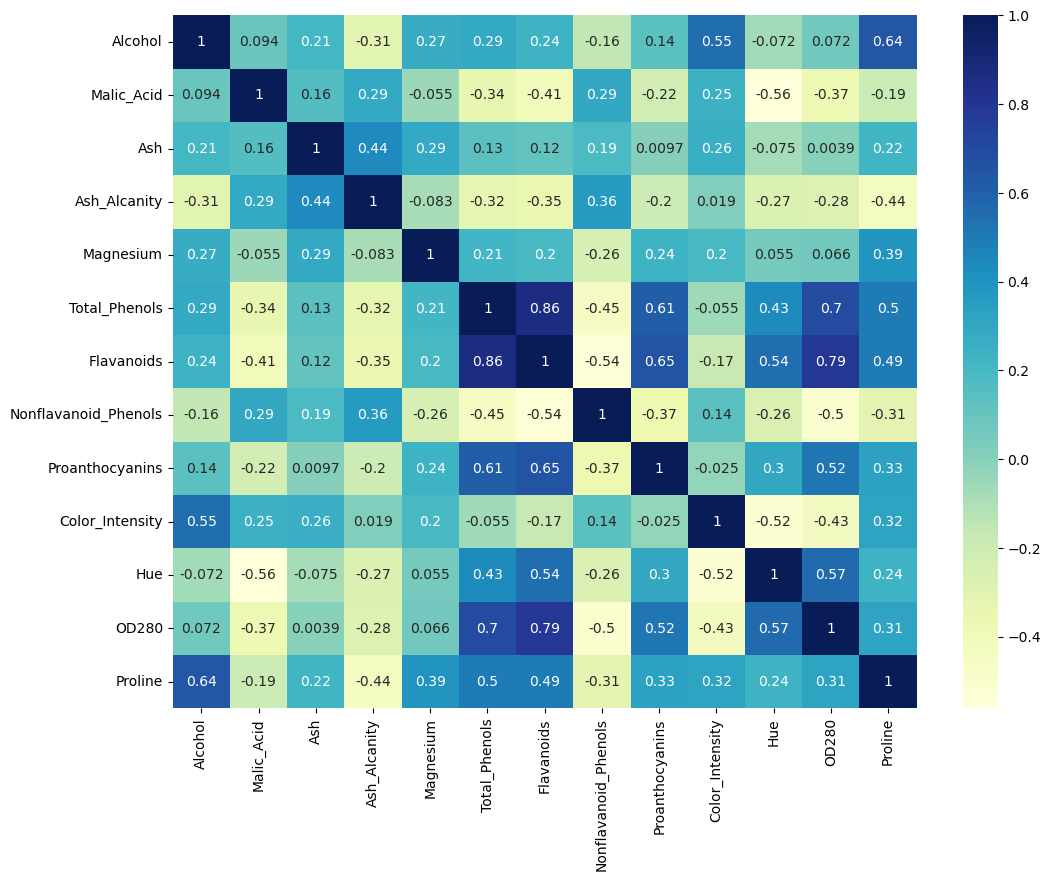

In [6]:
corr_matrix=df.corr()
corr_matrix
plt.figure(figsize=(12,9))
sns.heatmap(corr_matrix,annot=True,cmap='YlGnBu')

In [7]:
df1=df.drop(['Flavanoids','Nonflavanoid_Phenols'],axis=1)

In [50]:
# Preprocess the data by standardizing it
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df1)
mm=MinMaxScaler()
df_mm=scaler.fit_transform(df1)

# Kmeans Clustering

In [9]:
# Get the optimum number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

C:\Users\ajmal\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


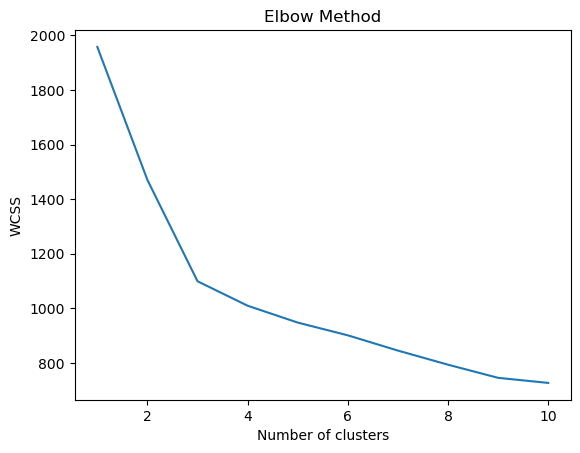

In [10]:
# Plot the WCSS values for each number of clusters
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [11]:
# Create the K-means model with the optimum number of clusters
kmeans = KMeans(n_clusters=3, init='k-means++',random_state=42)
y_kmeans=kmeans.fit_predict(df_scaled)

In [12]:
y_kmeans

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [13]:
df1=df.iloc[:].values
df1

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

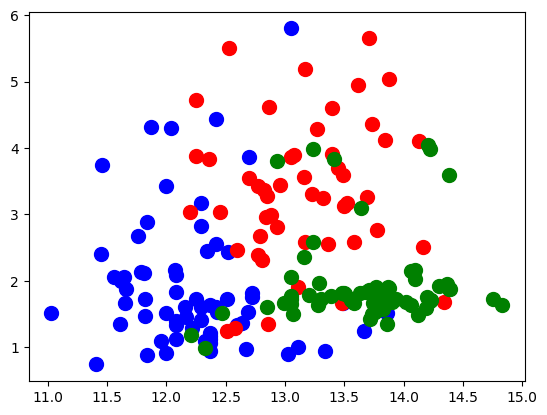

In [14]:
plt.scatter(df1[y_kmeans==0,0],df1[y_kmeans==0,1],s=100,c='blue',label='cluster 1')
plt.scatter(df1[y_kmeans==1,0],df1[y_kmeans==1,1],s=100,c='red',label='cluster 1')
plt.scatter(df1[y_kmeans==2,0],df1[y_kmeans==2,1],s=100,c='green',label='cluster 1')

# PCA

In [15]:
# Apply PCA to the scaled data
pca = PCA(n_components=.95)
df_pca = pca.fit_transform(df_scaled)


In [16]:
y_pca=kmeans.fit_predict(df_scaled)
y_pca

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [17]:
df_pca.shape

(178, 9)

In [18]:
# Fit the K-means model to the PCA transformed data
kmeans = KMeans(n_clusters=3, init='k-means++',random_state=42)
kmeans.fit(df_pca)

KMeans(n_clusters=3, random_state=42)

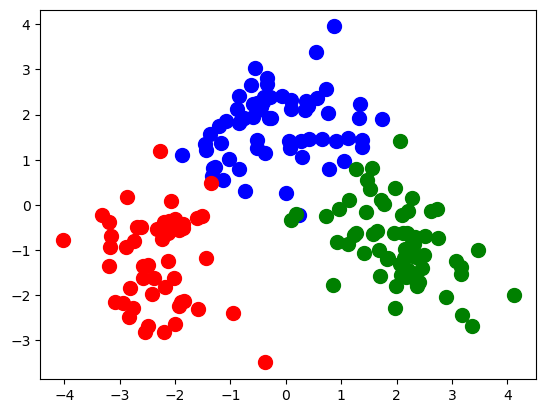

In [19]:
plt.scatter(df_pca[y_kmeans==0,0],df_pca[y_kmeans==0,1],s=100,c='blue',label='cluster 1')
plt.scatter(df_pca[y_kmeans==1,0],df_pca[y_kmeans==1,1],s=100,c='red',label='cluster 1')
plt.scatter(df_pca[y_kmeans==2,0],df_pca[y_kmeans==2,1],s=100,c='green',label='cluster 1')

# Agglomerative

In [20]:
# Perform Agglomerative Clustering
agg_clustering = AgglomerativeClustering()
y_agg = agg_clustering.fit_predict(df1)

In [21]:
y_agg

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

In [22]:
# Calculate silhouette score for different number of clusters
silhouette_scores = []
for k in range(2, 11):
    agg_clustering = AgglomerativeClustering(n_clusters=k)
    y_agg = agg_clustering.fit_predict(df1)
    silhouette_scores.append(metrics.silhouette_score(df1, y_agg))

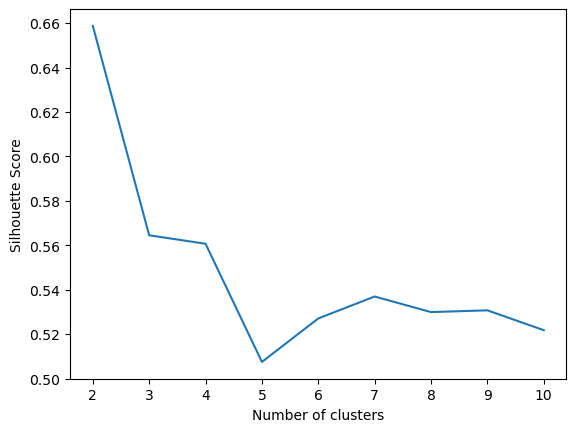

In [62]:
# Plot the silhouette scores
plt.plot(range(2, 11), silhouette_scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [23]:
# Find the optimum number of clusters
optimal_k = range(2, 11)[silhouette_scores.index(max(silhouette_scores))]
print("Optimal number of clusters for Agglomerative Clustering:", optimal_k)

Optimal number of clusters for Agglomerative Clustering: 2


In [24]:
# Train the model with optimum number of clusters
agg_clustering = AgglomerativeClustering(n_clusters=optimal_k)
agg_clustering.fit(df)

AgglomerativeClustering()

# DBScan

In [58]:
# Perform DBSCAN Clustering
dbscan = DBSCAN()
y_dbscan = dbscan.fit_predict(df)

In [59]:
np.unique(y_dbscan)

array([-1], dtype=int64)

In [60]:
# Calculate silhouette score for different values of eps
silhouette_scores = []
eps_values = [0.1, 0.2, 0.3, 0.4, 0.5]
for eps in eps_values:
    dbscan = DBSCAN(eps=eps,min_samples=0,metric=dice)
    silhouette_scores.append(metrics.silhouette_score(df, y_dbscan))

ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

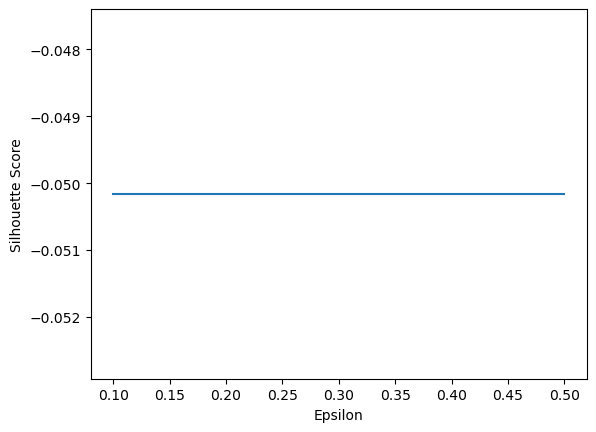

In [31]:
# Plot the silhouette scores
plt.plot(eps_values, silhouette_scores)
plt.xlabel('Epsilon')
plt.ylabel('Silhouette Score')
plt.show()

In [113]:
# Find the optimum value of eps
optimal_eps = eps_values[silhouette_scores.index(max(silhouette_scores))]
print("Optimal value of eps for DBSCAN:", optimal_eps)

Optimal value of eps for DBSCAN: 0.1


In [114]:
# Train the model with optimum value of eps
dbscan = DBSCAN(eps=optimal_eps)
dbscan.fit(df_scaled)

DBSCAN(eps=0.1)